In [23]:
#import the data
import numpy as np
import pandas as pd
df1_train = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Support Vector Machine\\SalaryData_Train.csv")

In [24]:
df1_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df1_train.shape    #(30161, 14)

(30161, 14)

In [26]:
df2_test = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Support Vector Machine\\SalaryData_Test.csv")

In [27]:
df2_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [28]:
df2_test.shape    #(15060, 14)

(15060, 14)

In [30]:
df1_train.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [31]:
df2_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [32]:
#EDA----->EXPLORATORY DATA ANALYSIS on Train Data
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = df1_train[df1_train.columns[[0,3,9,10,11]]]
data

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30156,27,12,0,0,38
30157,40,9,0,0,40
30158,58,9,0,0,40
30159,22,9,0,0,20


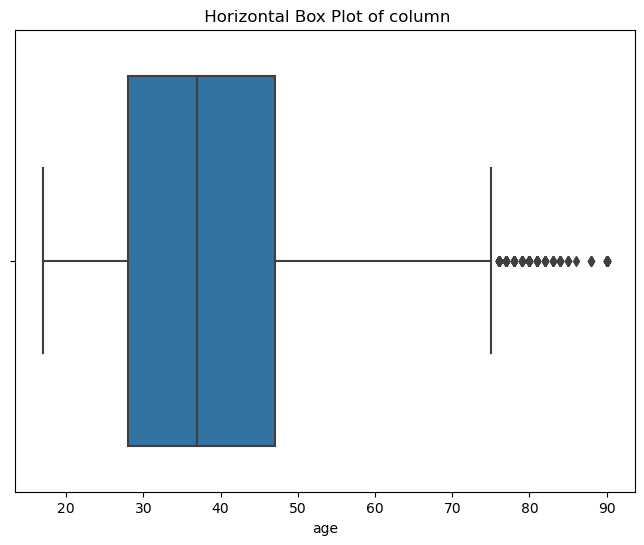

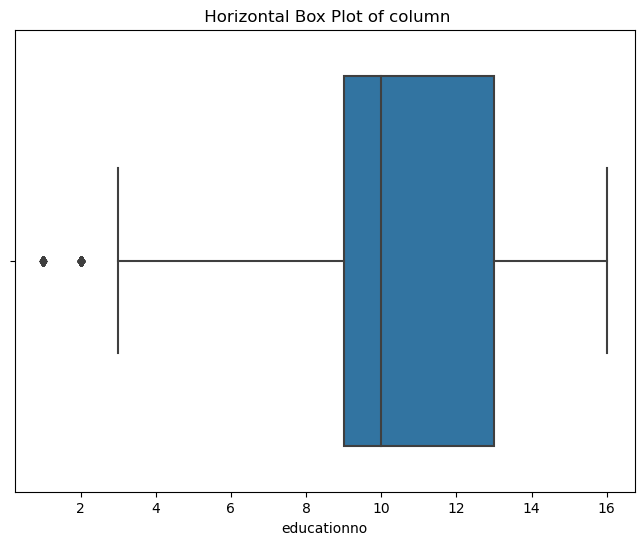

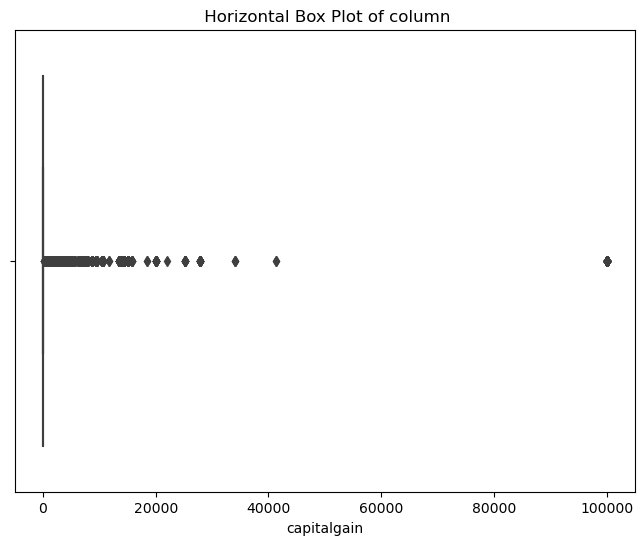

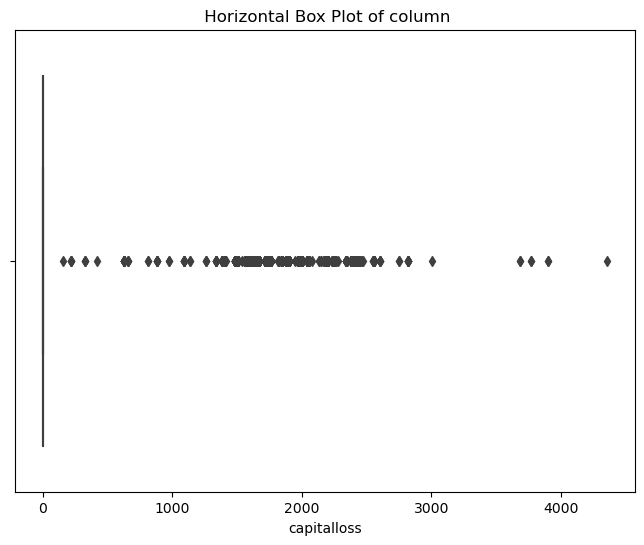

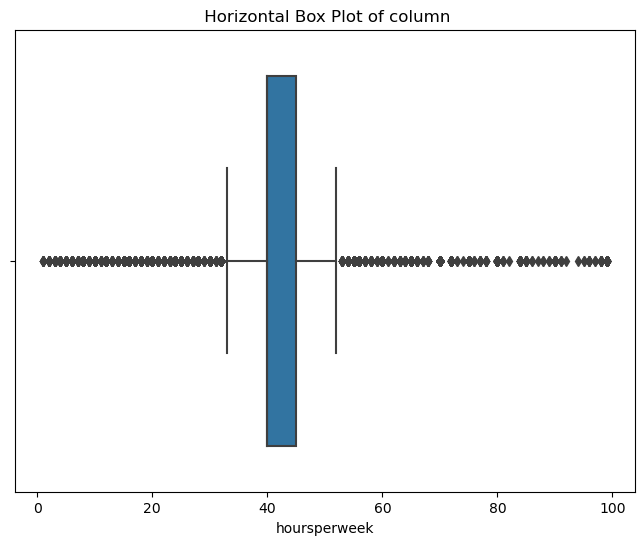

In [34]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df1_train[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

In [36]:
df1_cont = df1_train[df1_train.columns[[0,3,9,10,11]]]

In [37]:
df1_cont.shape  #(30161, 5)

(30161, 5)

In [38]:
from scipy import stats

In [39]:
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [40]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1_cont))

In [41]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [42]:
# Remove rows with outliers from the DataFrame
df1_train = df1_train[~outlier_mask]

In [43]:
df1_train.shape  #(26752, 14)

(27920, 14)

In [44]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27920 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            27920 non-null  int64 
 1   workclass      27920 non-null  object
 2   education      27920 non-null  object
 3   educationno    27920 non-null  int64 
 4   maritalstatus  27920 non-null  object
 5   occupation     27920 non-null  object
 6   relationship   27920 non-null  object
 7   race           27920 non-null  object
 8   sex            27920 non-null  object
 9   capitalgain    27920 non-null  int64 
 10  capitalloss    27920 non-null  int64 
 11  hoursperweek   27920 non-null  int64 
 12  native         27920 non-null  object
 13  Salary         27920 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [45]:
#EDA----->EXPLORATORY DATA ANALYSIS on the Test Data
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = df2_test[df2_test.columns[[0,3,9,10,11]]]
data

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


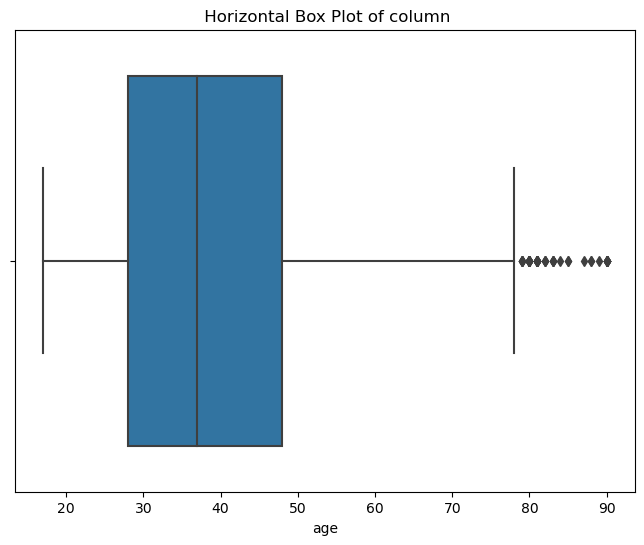

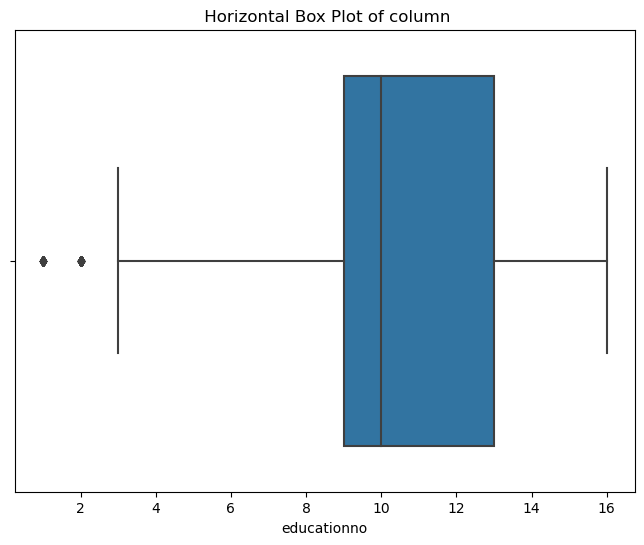

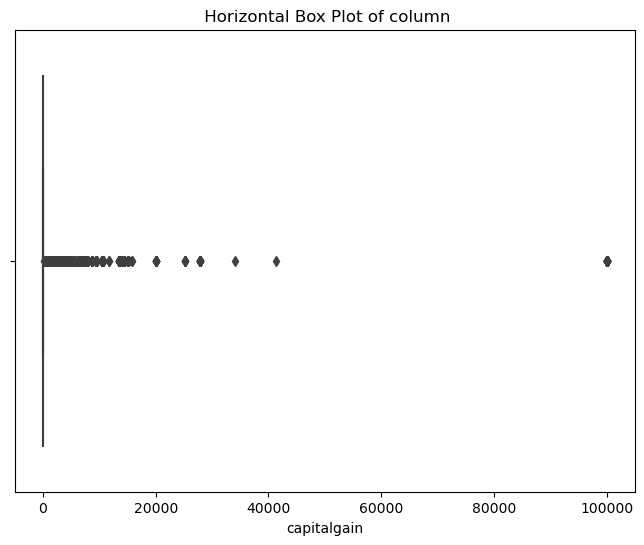

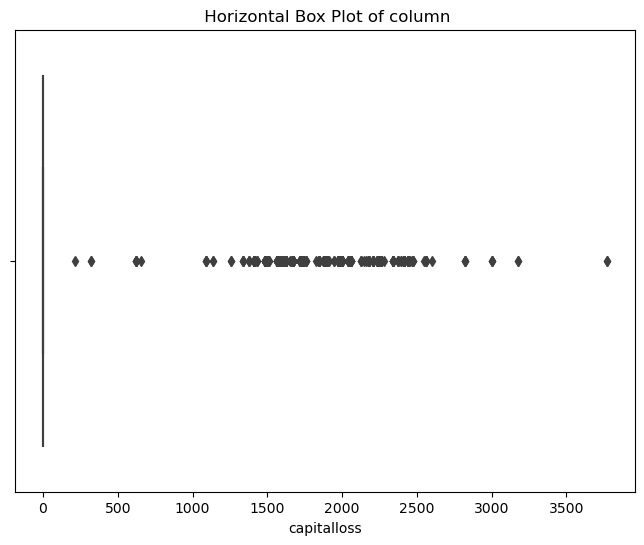

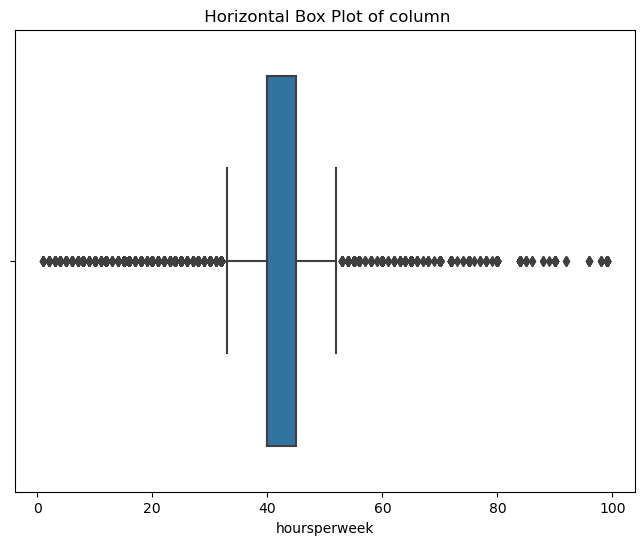

In [47]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df2_test[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

In [48]:
df2_cont = df2_test[df2_test.columns[[0,3,9,10,11]]]

In [49]:
df2_cont.shape  #(15060, 5)

(15060, 5)

In [50]:
from scipy import stats

In [51]:
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [53]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df2_cont))

In [54]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [55]:
# Remove rows with outliers from the DataFrame
df2_test = df2_test[~outlier_mask]
df2_test.shape  #(13903, 14)

(13903, 14)

In [56]:
# Assuming your target variable column is named 'target' in both DataFrames
X_train = df1_train.drop(columns=['Salary'])  # Features for training data

In [57]:
Y_train = df1_train['Salary']               # Target variable for training data

In [58]:
X_test = df2_test.drop(columns=['Salary'])    # Features for testing data

In [59]:
Y_test = df2_test['Salary']                   # Target variable for testing data

In [60]:
# Apply label encoding to categorical columns
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

In [61]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [62]:
for column in categorical_columns:
    X_train[column] = LE.fit_transform(X_train[column])
    X_test[column] = LE.transform(X_test[column]) 

In [63]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [64]:
X_train = SS.fit_transform(X_train)

In [65]:
X_test = SS.transform(X_test)

In [66]:
#This code ensures that both training and testing data are label-encoded and 
#standardized correctly before fitting the SVM model.
# Create and train your SVM model
#Linear Function
from sklearn.svm import SVC         #Linear
svc = SVC(C=1.0, kernel='linear')

In [67]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [68]:
Y_pred_train = svc.predict(X_train)

In [69]:
Y_pred_test = svc.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)

In [71]:
print("Training accuracy score:", ac1.round(3))    #Train accuracy score: 0.806

Training accuracy score: 0.806


In [72]:
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing accuracy score:", ac2.round(3))     #Test accuracy score: 0.805

Testing accuracy score: 0.805


In [73]:
"""when we have two distinct datasets,one for training and one for testing,
 the validation approach involving cross validation
 may not be directly applicable.The purpose of cross validation is to utilize the 
 training data for model validationa and as 
 a tuning parameter.so we will split the train data into train set and validation set,
 fit our model on the train data and evaluate the model performance using the validation 
 data ,once we have selected the best performing model we will evaluate on the independent test data set 
 to estimate the models performance on unseen data. """

# Assuming we have X_train, Y_train, X_test, Y_test
# Step 1: Split the training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.75, random_state=42)

In [74]:
# Step 2: Fit our model on the training set and evaluating  on the validation set
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='linear') # linear function

In [75]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [76]:
Y_pred_train = svc.predict(X_train)
Y_pred_val = svc.predict(X_val)

In [77]:
# Step 3: Evaluating  the performance on the validation set
from sklearn.metrics import accuracy_score
ac_val = accuracy_score(Y_val, Y_pred_val)
print("Validation accuracy score:", ac_val.round(3))   #Validation accuracy score: 0.805

Validation accuracy score: 0.805


In [78]:
# Step 4: Once we have selected the best model,  we evaluate it on the independent test dataset
Y_pred_test = svc.predict(X_test)
ac_test = accuracy_score(Y_test, Y_pred_test)
print("Test accuracy score:", ac_test.round(3))      #Test accuracy score: 0.806

Test accuracy score: 0.806


In [79]:
#Validation accuracy score: 0.805
#Test accuracy score: 0.806

##Polynomial function
#SVM
from sklearn.svm import SVC
svc =SVC(degree=3,kernel='poly')  #Polynomial function

In [80]:
svc.fit(X_train,Y_train)

SVC(kernel='poly')

In [81]:
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [82]:
#Metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("training accuracy score:",(ac1*100).round(3))    #training accuracy score: 84.733
ac2 = accuracy_score(Y_test,Y_pred_test)
print("testing accuracy score:",(ac2*100).round(3))     #testing accuracy score: 84.277

training accuracy score: 84.733
testing accuracy score: 84.277


In [83]:
# Assuming we have X_train, Y_train, X_test, Y_test
# Step 1: Split the training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.75, random_state=42)

In [84]:
# Step 2: Fit our model on the training set and evaluating  on the validation set
from sklearn.svm import SVC
svc = SVC(degree=3, kernel='poly') # linear function

In [85]:
svc.fit(X_train, Y_train)

SVC(kernel='poly')

In [86]:
Y_pred_train = svc.predict(X_train)
Y_pred_val = svc.predict(X_val)

In [87]:
# Step 3: Evaluating  the performance on the validation set
from sklearn.metrics import accuracy_score
ac_val = accuracy_score(Y_val, Y_pred_val)
print("Validation accuracy score:", ac_val.round(3))      #Validation accuracy score: 0.834

Validation accuracy score: 0.834


In [88]:
# Step 4: Once we have selected the best model,  we evaluate it on the independent test dataset
Y_pred_test = svc.predict(X_test)
ac_test = accuracy_score(Y_test, Y_pred_test)
print("Test accuracy score:", ac_test.round(3))     #Test accuracy score: 0.842

Test accuracy score: 0.842


In [89]:
#Radial Basis Function
#SVM
from sklearn.svm import SVC
svc =SVC(degree=3,kernel='rbf')  #Radial Basis Function

In [90]:
svc.fit(X_train,Y_train)

SVC()

In [91]:
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [93]:
#Metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training accuracy score:",(ac1*100).round(3))    #training accuracy score:  85.279
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing accuracy score:",(ac2*100).round(3))     #testing accuracy score:  84.521

Training accuracy score: 85.279
Testing accuracy score: 84.521


In [94]:
# Assuming we have X_train, Y_train, X_test, Y_test
# Step 1: Split the training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.75, random_state=42)

In [95]:
# Step 2: Fit our model on the training set and evaluating  on the validation set
from sklearn.svm import SVC
svc = SVC(degree=3, kernel='rbf') # Radial Basis Function

In [96]:
svc.fit(X_train, Y_train)

SVC()

In [97]:
Y_pred_train = svc.predict(X_train)
Y_pred_val = svc.predict(X_val)

In [98]:
# Step 3: Evaluating  the performance on the validation set
from sklearn.metrics import accuracy_score
ac_val = accuracy_score(Y_val, Y_pred_val)
print("Validation accuracy score:", ac_val.round(3))

Validation accuracy score: 0.856


In [99]:
# Step 4: Once we have selected the best model,  we evaluate it on the independent test dataset
Y_pred_test = svc.predict(X_test)
ac_test = accuracy_score(Y_test, Y_pred_test)
print("Test accuracy score:", ac_test.round(3))

Test accuracy score: 0.846


In [100]:
#Validation accuracy score: 0.856
#Test accuracy score: 0.846

# Model evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
Y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.8461483133136734
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.95      0.91     10741
        >50K       0.74      0.49      0.59      3162

    accuracy                           0.85     13903
   macro avg       0.80      0.72      0.75     13903
weighted avg       0.84      0.85      0.83     13903

Confusion Matrix:
 [[10204   537]
 [ 1602  1560]]


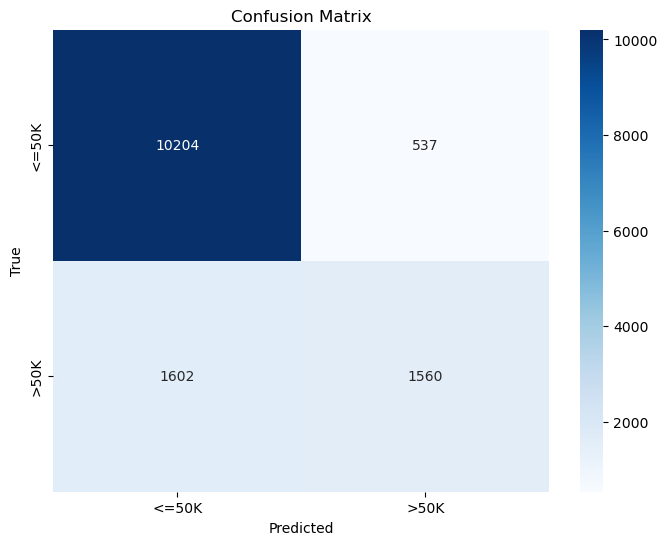

In [101]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# The SVM model achieved an accuracy of approximately 84.6% on the test data. 
#This means that the model correctly predicted the salary category for about 84.6%
''' For the "<=50K" category (individuals with salaries less than or equal to $50K):
 Precision (accuracy of positive predictions): 86% , Recall (true positive rate): 95% , 
 F1-score (harmonic mean of precision and recall): 91%'''

'''For the ">50K" category (individuals with salaries greater than $50K):
Precision: 74%
Recall: 49%
F1-score: 59%'''

#The model performs better in predicting the "<=50K" category, with a higher precision, recall, and F1-score. 
#This indicates that the model is more accurate in identifying individuals with salaries less than or equal to $50K.